# Project: Investigate the Sales master dataset

## Table of contents

* [Introduction](#Introduction)
* [Data Wrangling](#Data_wrangling)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [Conclusions](#Conclusions)

## Introduction

## About super store dataset

In this notebook we will explore Data of a canadian superstore that exists in different places around the world and try to gain some insights about the business.

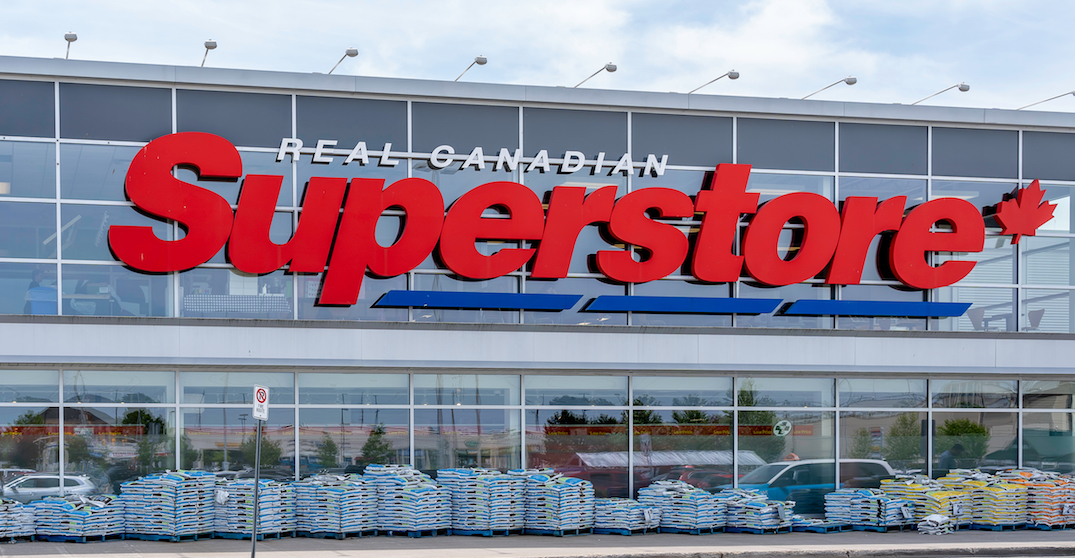

In [50]:
from IPython.display import Image
Image(filename="superstore.jpg", width=900, height=200)

### Proposed Questions

* What is the overall sales trend along the years?
* What are the top 10 products by sales?
* What are the most prefered shipping modes?
* which are the most profitable category and sub-category?
* Which months of the year are more likely to produce more profit in each years?
* How is Profit affected by shipping cost variables?
* How is Sales affected by shipping cost variables?
* What is the kind of relation between sales and profit?
* What is the most demanding market among all the markets?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
df=pd.read_excel('superstore_sales.xlsx')

## Data_wrangling

Let us now explore the properties and cleanliness of the dataset to make the data wrangling decisions. After running some cells, I will discuss my finding.

In [3]:
# investigating dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [4]:
# print first few lines of data

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [5]:
# checking for duplicates

df[df.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


In [6]:
df.duplicated().all()

False

### Observations

1. data contains 51,290 and 21 columns
2. column dta types vary among ints,floats,objects and datatime64
3. There are no null values in the dataset
4. There are no duplicated rows in the dataset

### Data Cleaning

**First**,I will creat a month column by extracting the month from order_date column and transfer the number of the month to the month name which will help me answer question

In [7]:
#importing calendar library for this step

import calendar

#extracting the month fromthe date column

df['month']=df['order_date'].dt.month

# changing the month number into month name

df['month']=df['month'].apply(lambda x:calendar.month_abbr[x])

**Second**,I will drop the columns that I do not need to answer my proposed questions.

In [8]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month'],
      dtype='object')

In [9]:
# Dropping columns
df.drop(['ship_date','customer_name','segment', 'state', 'country','product_id','order_priority'],axis=1,inplace=True)

In [10]:
# checking for final results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       51290 non-null  object        
 1   order_date     51290 non-null  datetime64[ns]
 2   ship_mode      51290 non-null  object        
 3   market         51290 non-null  object        
 4   region         51290 non-null  object        
 5   category       51290 non-null  object        
 6   sub_category   51290 non-null  object        
 7   product_name   51290 non-null  object        
 8   sales          51290 non-null  float64       
 9   quantity       51290 non-null  int64         
 10  discount       51290 non-null  float64       
 11  profit         51290 non-null  float64       
 12  shipping_cost  51290 non-null  float64       
 13  year           51290 non-null  int64         
 14  month          51290 non-null  object        
dtypes: datetime64[ns](1

## Exploratory_Data_Analysis

let us start our investigation of the above questions. But, first, let's plot some histograms to get an overview of the distribution of different variables. And then let's create a heatmap to see how different variables are correlated.

In [11]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


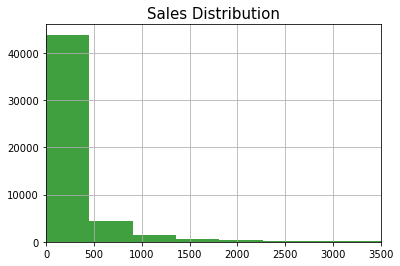

In [12]:
plt.hist(df['sales'],bins=50,color='g',alpha=0.75);
plt.grid();
plt.xlim(0,3500);
plt.title('Sales Distribution',size=15);

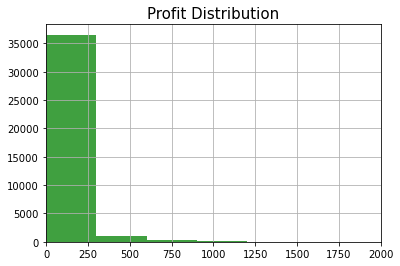

In [13]:
plt.hist(df['profit'],bins=50,alpha=0.75,color='g');
plt.grid();
plt.xlim(0,2000);
plt.title('Profit Distribution',size=15);

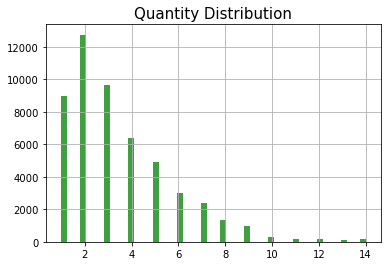

In [14]:
plt.hist(df['quantity'],bins=50,alpha=0.75,color='g');
plt.grid();
plt.title('Quantity Distribution',size=15);

## Observations

1. Sales of different products varies among 0 and 400 as an amount of sales and decreases gradually from 500 to 3500
2. Profits for different products varies among 0 to 250 and decreases gradually from 250 to around 1000 
3. Quantities of different products are mostly between 1 and 4 and decreases from 5 to 14 

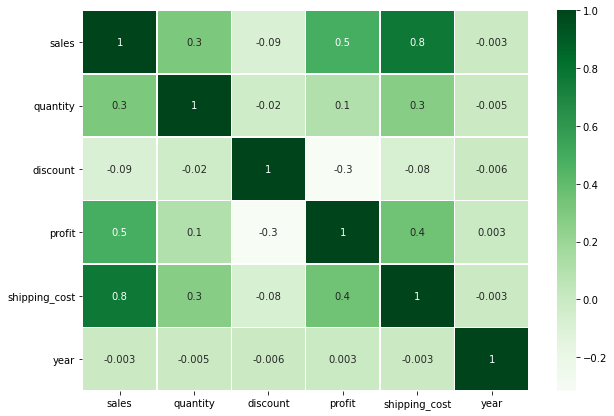

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='Greens',fmt='.1g',linewidth=0.5);

### Observations

1. Strong correlation:
  * Sales and shipping cost


2. Moderate correlations:
   * Sales and Profit
   * profit and shipping cost

## Questions

### Q1.What is the overall sales trend along the years?

In [16]:
Sales_per_years=df.groupby('year')['sales'].sum()
Sales_per_years

year
2011    2.259451e+06
2012    2.677439e+06
2013    3.405746e+06
2014    4.299866e+06
Name: sales, dtype: float64

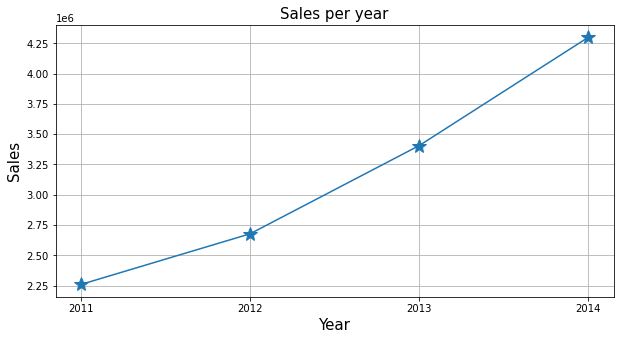

In [17]:
plt.figure(figsize=(10,5))
Sales_per_years.plot.line(marker='*',markersize=15);
plt.grid();
plt.title('Sales per year',size=15);
plt.xlabel('Year',size=15)
plt.ylabel('Sales',size=15)
plt.xticks([2011,2012,2013,2014]);

The plot shows that the sales are increasing along the years from 2011 to 2014 

### Q2.What are the top 10 products by sales?

In [28]:
Top10_products=df.groupby(['product_name'])['product_name'].count().sort_values(ascending=False).head(10)

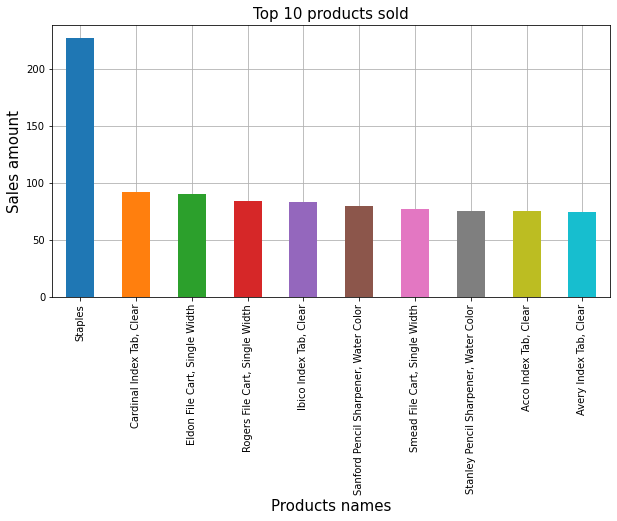

In [29]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'];
plt.figure(figsize=(10,5))
Top10_products.plot.bar(color=colors,zorder=3);
plt.title('Top 10 products sold',size=15)
plt.xlabel('Products names',size=15)
plt.ylabel('Sales amount',size=15)
plt.grid(zorder=0)

Based on the above plot,The Top 10 selling products are:

1. Staples
2. Cardinal Index Tab, Clear                               
3. Eldon File Cart, Single Width             
4. Rogers File Cart, Single Width            
5. Ibico Index Tab, Clear                    
6. Sanford Pencil Sharpener, Water Color     
7. Smead File Cart, Single Width             
8. Stanley Pencil Sharpener, Water Color     
9. Acco Index Tab, Clear                     
10. Avery Index Tab, Clear

### Q3.What are the most prefered shipping modes?

In [30]:
Most_prefered_mode=df.groupby(['ship_mode'])['order_id'].count().sort_values(ascending=False)

Based on the Above piechart the most preferred shipping mode are:

1. Standard class
2. Second class

### Q4.which are the most profitable category and sub-category?

In [31]:
df.head(1)

,order_id,order_date,ship_mode,market,region,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year,month
0,AG-2011-2040,2011-01-01,Standard Class,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,2011,Jan


In [32]:
Most_proditable_Cat=df.groupby(['category'])['profit'].sum().sort_values(ascending=False)
Most_proditable_Cat
col=['#9467bd', '#ff7f0e', '#2ca02c']

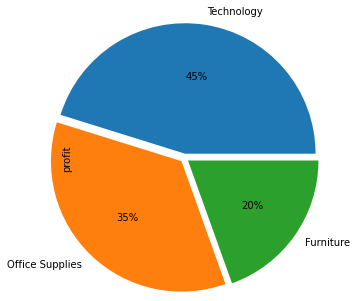

In [33]:
Most_proditable_Cat.plot.pie(autopct='%0.f%%',explode=[0.05,0.05,0.05],radius=1.5);

As shown in the pot the most profitable category is Technology

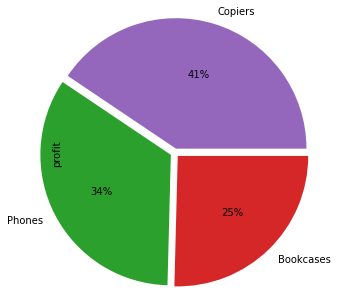

In [34]:
Most_proditable_subCat=df.groupby(['sub_category'])['profit'].sum().sort_values(ascending=False).head(3)
cols=['#9467bd', '#2ca02c', '#d62728']
Most_proditable_subCat.plot.pie(autopct='%0.f%%',explode=[0.05,0.05,0.05],radius=1.5,colors=cols)

As shown in the pot the most profitable category is Copiers

### Q5.Which months of the year are more likely to produce more profit in each years?

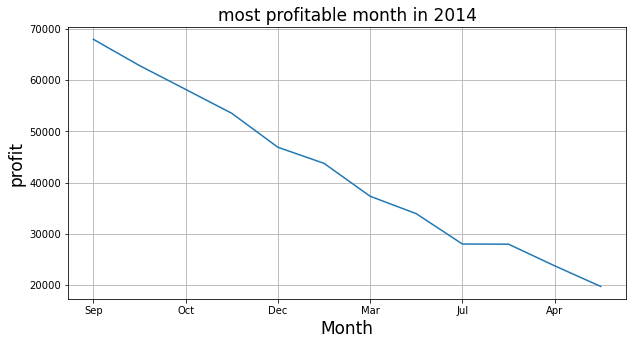

In [35]:
DF2014=df[df['year']==2014]
DF2014_month=DF2014.groupby(['month'])['profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5));
DF2014_month.plot.line();
plt.grid();
plt.title('most profitable month in 2014',size=17);
plt.xlabel('Month',size=17);
plt.ylabel('profit',size=17);

In [36]:
DF2014_month.head(1)

month
Sep    67979.4511
Name: profit, dtype: float64

The plot shows that the most profitable month in 2014 is september with total of 67979

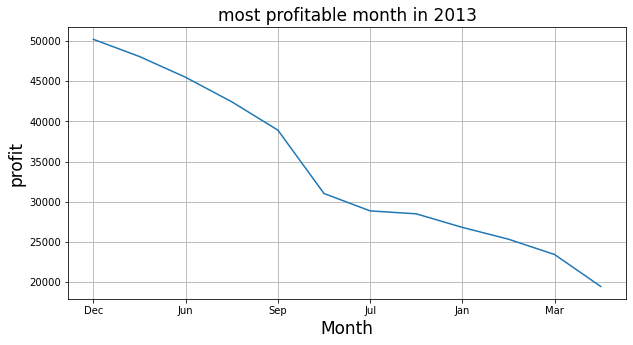

In [37]:
DF2013=df[df['year']==2013]
DF2013_month=DF2013.groupby(['month'])['profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5));
DF2013_month.plot.line();
plt.grid();
plt.title('most profitable month in 2013',size=17);
plt.xlabel('Month',size=17);
plt.ylabel('profit',size=17);

In [38]:
DF2013_month.head(1)

month
Dec    50202.87112
Name: profit, dtype: float64

The plot shows that the most profitable month in 2013 is December with total of 50202

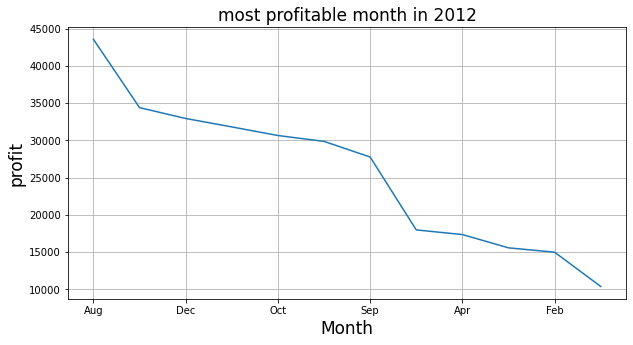

In [39]:
DF2012=df[df['year']==2012]
DF2012_month=DF2012.groupby(['month'])['profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5));
DF2012_month.plot.line();
plt.grid();
plt.title('most profitable month in 2012',size=17);
plt.xlabel('Month',size=17);
plt.ylabel('profit',size=17);

In [40]:
DF2012_month.head(1)

month
Aug    43573.87858
Name: profit, dtype: float64

The plot shows that the most profitable month in 2012 is August with total of 43573

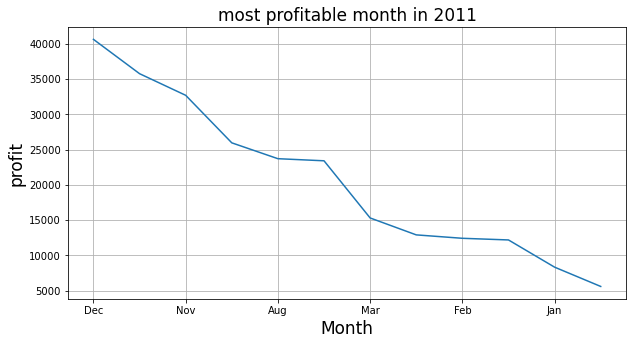

In [41]:
DF2011=df[df['year']==2011]
DF2011_month=DF2011.groupby(['month'])['profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5));
DF2011_month.plot.line();
plt.grid();
plt.title('most profitable month in 2011',size=17);
plt.xlabel('Month',size=17);
plt.ylabel('profit',size=17);

In [42]:
DF2011_month.head(1)

month
Dec    40647.984
Name: profit, dtype: float64

The plot shows that the most profitable month in 2011 is Decmeber with total of 40647

### Q6.How is Profit affected by shipping cost variables?

I will calculate pearson correlation for each realtion to interpret the relation mathematically

In [43]:
#pearson correlation calcuation

df[['profit','shipping_cost']].corr()

,profit,shipping_cost
profit,1.000000,0.357033
shipping_cost,0.357033,1.000000


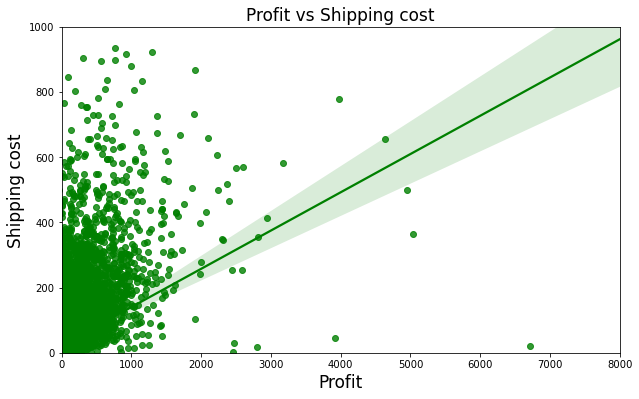

In [44]:
# Now lets draw the plot line

plt.figure(figsize=(10,6));
sns.regplot(x=df['profit'],y=df['shipping_cost'],data=df,color='g');
plt.xlim(0,8000);
plt.ylim(0,1000);
plt.title('Profit vs Shipping cost',size=17);
plt.xlabel('Profit',size=17);
plt.ylabel('Shipping cost',size=17);

Pearson correlation with 0.357 shows that there is a moderate relationship between Profit and shipping cost, if shipping cost increased the profit will increase

### Q7.How is Sales affected by shipping cost variables?

In [45]:
#pearson correlation calcuation

df[['sales','shipping_cost']].corr()

,sales,shipping_cost
sales,1.000000,0.768073
shipping_cost,0.768073,1.000000


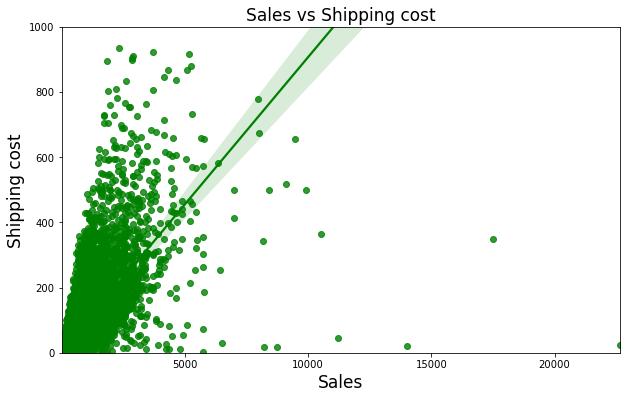

In [46]:
# Now lets draw the plot line

plt.figure(figsize=(10,6));
sns.regplot(x=df['sales'],y=df['shipping_cost'],data=df,color='g');
plt.ylim(0,1000);
plt.title('Sales vs Shipping cost',size=17);
plt.xlabel('Sales',size=17);
plt.ylabel('Shipping cost',size=17);

Pearson correlation with 0.768 shows that there is a Strong relationship between Sales and shipping cost, as sales increases the the shipping cost highly increases

### Q8.What is the kind of relation between sales and profit?

In [47]:
#pearson correlation calcuation

df[['sales','profit']].corr()

,sales,profit
sales,1.000000,0.485939
profit,0.485939,1.000000


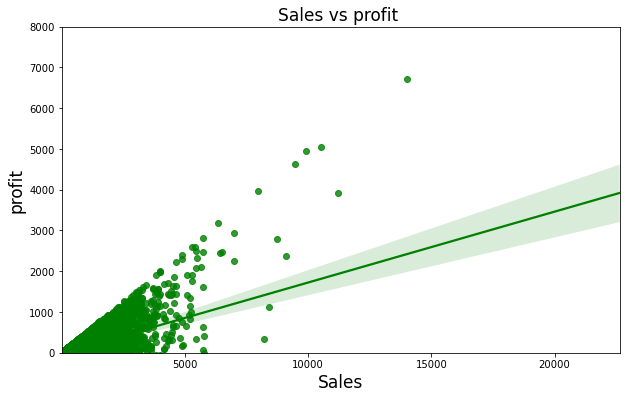

In [48]:
plt.figure(figsize=(10,6));
sns.regplot(x=df['sales'],y=df['profit'],data=df,color='g');
plt.title('Sales vs profit ',size=17);
plt.ylim(0,8000)
plt.xlabel('Sales',size=17);
plt.ylabel('profit',size=17);

Pearson correlation with 0.48 shows that there is a moderate relationship between Sales and profit, as sales increases the the profit increases

### Q9.What is the most demanding market among all the markets?

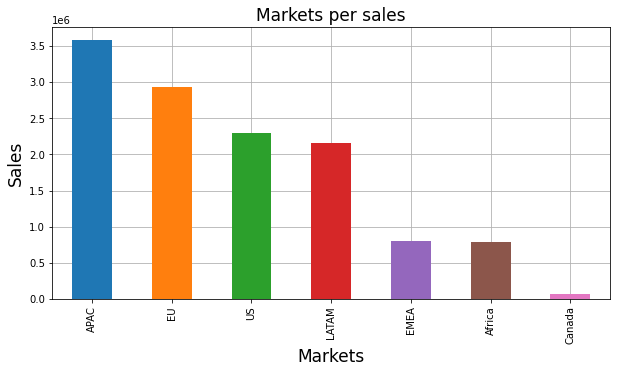

In [49]:
plt.figure(figsize=(10,5))
Most_demanding_market=df.groupby(['market'])['sales'].sum().sort_values(ascending=False)
Most_demanding_market.plot.bar(color=colors,zorder=3);
plt.grid(zorder=0);
plt.title('Markets per sales',size=17);
plt.xlabel('Markets',size=17);
plt.ylabel('Sales',size=17);

Best market per sales is APAC which is Asia pcific market

### Conclusions

### Findings

1. The Top 10 selling products are:

 A. Staples
   B. Cardinal Index Tab, Clear                              
   C. Eldon File Cart, Single Width                            
   D. Rogers File Cart, Single Width                               
   E. Ibico Index Tab, Clear                       
   F. Sanford Pencil Sharpener, Water Color                  
   G. Smead File Cart, Single Width        
   H. Stanley Pencil Sharpener, Water Color    
   I. Acco Index Tab, Clear                               
   J. Avery Index Tab, Clear

2. The plot shows that the sales are increasing along the years from 2011 to 2014
3. The most preferred shipping mode are Standard class,Second class
4. The most profitable category is Technology
5. The most profitable month in 2014 is september with total of 67979
6. There is a moderate relationship between Profit and shipping cost, if shipping cost increased the profit will increase, their Pearson correlation is estimated by 0.357
7. Pearson correlation with 0.768 shows that there is a Strong relationship between Sales and shipping cost, as sales increases the the shipping cost highly increases
8. Pearson correlation with 0.48 shows that there is a moderate relationship between Sales and profit, as sales increases the the profit increases
9. Best market per sales is APAC which is Asia pcific market